<a href="https://colab.research.google.com/github/HKLeeeee/Studying_Algorithm/blob/main/%5Bpycaret%5Danalytics_model_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

In [ ]:
!pip install pycaret

<font color='red'>런타임 재실행</font>

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import classification_report
import os
from time import time
from pycaret.classification import *
from pycaret.utils import check_metric

# Load Data

In [5]:
files = glob("/content/drive/MyDrive/Colab Notebooks/maindata set/*knn3*predic(0,1)*.csv")

data_list = {}
for file in files:
    file_name = file.split('/')[-1].split('_')[0]
    print(file_name)
    data = pd.read_csv(file, encoding="cp949")
    data['생태통로_효율성'] = data['생태통로_효율성'].astype(int)
    data_list[file_name] = data
    
print("총 {}개의 파일을 불러왔습니다.\n".format(len(files)))

tunnel
overpass
총 2개의 파일을 불러왔습니다.



# Define func

In [6]:
def pycaret_setup(data_set, target_idx: str, random_seed) :
    clf = setup(data=data_set, target=str(target_idx), train_size=0.8, 
                fix_imbalance=True, use_gpu=True, feature_selection=True, 
                remove_multicollinearity=True, session_id=random_seed)

In [7]:
# target_name : test 데이터의 목표변수 컬럼명
def predictModel(train_model, test_set, target_name): 
   pred = predict_model(train_model, data = test_set, verbose=False)
   print("개선율: "+str(check_metric(pred['Label'], test_set[target_name], metric = 'Accuracy')))

# Overpass

In [8]:
data_set = data_list['overpass'].drop('이용확인종_수', axis=1)
col_ls = list(data_set.columns)
target_idx = str(col_ls.index('생태통로_효율성'))

# 컬럼명 한글 오류
data_set.rename(columns={name: str(idx) for idx, name in enumerate(data_set.columns)}, 
                inplace = True)

# setup pycaret session
pycaret_setup(data_set, target_idx, 1)

,Description,Value
0,session_id,1
1,Target,0
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(300, 39)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='0',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=1,
              

## Find Best Model

In [9]:
compare_models(round = 3, sort = 'F1', errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.675,0.000,0.683,0.661,0.668,0.350,0.356,0.050
lda,Linear Discriminant Analysis,0.671,0.690,0.675,0.658,0.661,0.341,0.348,0.066
rf,Random Forest Classifier,0.658,0.707,0.692,0.642,0.657,0.319,0.332,0.930
qda,Quadratic Discriminant Analysis,0.475,0.492,0.983,0.479,0.644,-0.017,-0.042,0.026
lightgbm,Light Gradient Boosting Machine,0.658,0.680,0.630,0.660,0.639,0.315,0.320,0.130
dt,Decision Tree Classifier,0.638,0.638,0.657,0.622,0.633,0.274,0.278,0.026
gbc,Gradient Boosting Classifier,0.633,0.702,0.639,0.622,0.626,0.267,0.272,0.155
et,Extra Trees Classifier,0.633,0.697,0.645,0.617,0.626,0.265,0.270,1.710
ada,Ada Boost Classifier,0.621,0.666,0.614,0.619,0.608,0.243,0.252,0.131
nb,Naive Bayes,0.583,0.636,0.568,0.591,0.573,0.165,0.166,0.026


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001)

## model 생성 및 학습

In [10]:
overpass_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4583,0.4826,0.4167,0.4545,0.4348,-0.0833,-0.0836
1,0.7083,0.7986,0.6667,0.7273,0.6957,0.4167,0.4181
2,0.5417,0.6354,0.7500,0.5294,0.6207,0.0833,0.0917
3,0.6250,0.6840,0.5000,0.6667,0.5714,0.2500,0.2582
4,0.7917,0.8611,0.8333,0.7692,0.8000,0.5833,0.5854
5,0.7083,0.7292,0.6667,0.7273,0.6957,0.4167,0.4181
6,0.7083,0.7238,0.6364,0.7000,0.6667,0.4085,0.4099
7,0.6667,0.6049,0.8182,0.6000,0.6923,0.3469,0.3671
8,0.7083,0.8497,1.0000,0.6111,0.7586,0.4400,0.5311


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [11]:
#overpass_rf = tune_model(overpass_rf, optimize='F1')

## plot result

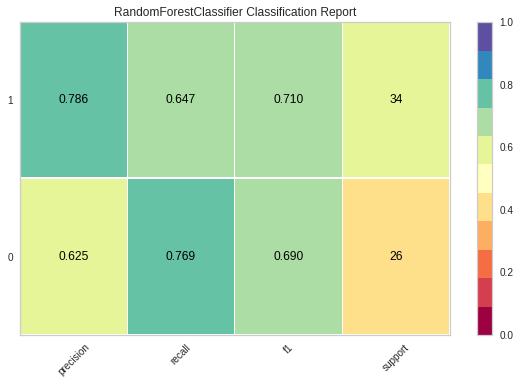

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(overpass_rf, plot='class_report', plot_kwargs={'cmap':'spectral'}, use_train_data=False)

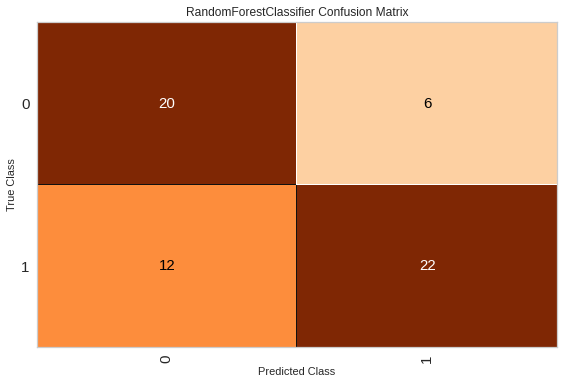

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(overpass_rf, plot='confusion_matrix', plot_kwargs={'cmap':'Oranges'})

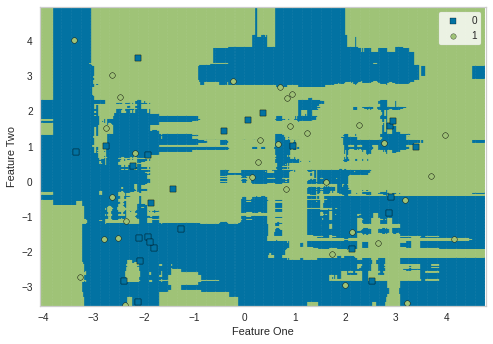

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
# ㅇㅅㅇ;;
plot_model(overpass_rf, plot='boundary')

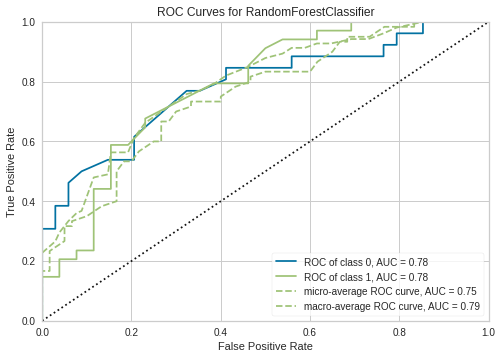

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(overpass_rf, plot='auc')

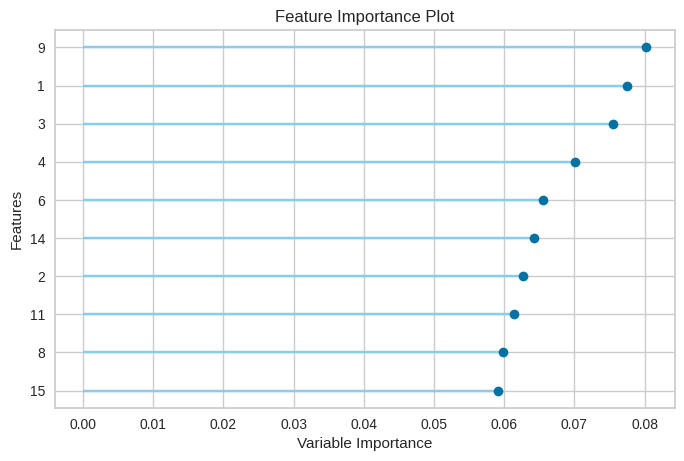

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(overpass_rf, plot='feature')

In [17]:
fi_df = pd.DataFrame({'Feature': [x.split('_')[0] for x in get_config('X_train').columns], 
              'Value' : overpass_rf.feature_importances_}).sort_values(by='Value', ascending=False)
feature_top10 = fi_df['Feature'][:10].to_list()
# feature_top10

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as       10  18_0.0  17_1.0  36_1.0  31_1.0  16_0.0  30_0.0    13         4  \
158  4.0     1.0     0.0     0.0     0.0     0.0     1.0   0.0  0.062344   
150  2.0     0.0     0.0     0.0     0.0     1.0     1.0   5.0  0.094188   
102  4.0     1.0     1.0     0.0     0.0     1.0     0.0   1.0  0.024274   
163  2.0     1.0     0.0     0.0     0.0     1.0     1.0  16.0  0.017209   
112  4.0     0.0     0.0     0.0     0.0     1.0     1.0   8.0  0.065721   
..   ...     ...     ...     ...     ...     ...     ...   ...       ...   
203  4.0     1.0     0.0     0.0     0.0     1.0     1.0   2.0 -0.793421   
255  4.0     1.0     1.0     0.0     0.0     1.0     0.0   0.0  2.016852   
72   4.0     1.0     0.0     1.0     0.0     0.0     1.0   0.0  0.131234   
235  4.0     1.0     0.0     0.0     0.0     1.0     1.0   0.0 -0.870865   
37   4.0     1.0     0.0     0.0     1.0  

In [ ]:
# model save
save_model(overpass_rf, '/content/drive/MyDrive/Colab Notebooks/dao_model/overpass_rf_nottune')

## Inference

In [19]:
inference_data_set = data_set[data_set['0']==0]
inference_data_set['0'] = 1

predictModel(overpass_rf, inference_data_set, '0')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.04


In [20]:
for idx in feature_top10 :
  amount = data_set.groupby('0')[idx].mean()
  diff= amount[0]-amount[1]
  inference_data_set[idx] = inference_data_set[idx] - diff
predictModel(overpass_rf, inference_data_set, '0')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.46


변수 중요도로 뽑힌 변수들의 값을 개선했을 때 56% 이상의 생태통로가 개선될 것으로 예측된다.

tune하면 0.333 -> 0.8xxx  
tune안하면 0.04 -> 0.43333

In [ ]:
overpass_insight = data_set.groupby('0')[feature_top10].mean().to_numpy()
overpass_insight = overpass_insight.T
overpass_insight = pd.DataFrame(overpass_insight, columns=['효율성 낮음 평균', '효율성 높음 평균'])
overpass_insight['feature_importances values'] = fi_df['Value'][:10].to_list()
overpass_insight.index = feature_top10
overpass_insight.index.name='Feature Name'
overpass_insight = overpass_insight[['feature_importances values','효율성 낮음 평균', '효율성 높음 평균']]
overpass_insight

# Tunnel

In [21]:
data_set = data_list['tunnel'].drop('이용확인종_수', axis=1)
col_ls = list(data_set.columns)
target_idx = str(col_ls.index('생태통로_효율성'))

# 컬럼명 한글 오류
data_set.rename(columns={name: str(idx) for idx, name in enumerate(data_set.columns)}, 
                inplace = True)

# setup pycaret session
pycaret_setup(data_set, target_idx, 123)

,Description,Value
0,session_id,123
1,Target,0
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(197, 41)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='0',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=123,
            

## Find Best Model

In [22]:
compare_models(round = 3, sort = 'F1', errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.733,0.793,0.743,0.744,0.735,0.465,0.473,0.940
ada,Ada Boost Classifier,0.687,0.744,0.718,0.692,0.691,0.374,0.388,0.294
gbc,Gradient Boosting Classifier,0.693,0.746,0.691,0.697,0.690,0.385,0.389,0.180
ridge,Ridge Classifier,0.689,0.000,0.707,0.676,0.685,0.378,0.385,0.042
et,Extra Trees Classifier,0.700,0.791,0.677,0.732,0.680,0.398,0.421,1.132
lda,Linear Discriminant Analysis,0.683,0.722,0.695,0.674,0.679,0.366,0.370,0.028
lightgbm,Light Gradient Boosting Machine,0.682,0.737,0.679,0.681,0.672,0.363,0.373,0.052
lr,Logistic Regression,0.670,0.733,0.696,0.651,0.662,0.342,0.353,0.284
dt,Decision Tree Classifier,0.669,0.669,0.614,0.694,0.641,0.338,0.348,0.028
nb,Naive Bayes,0.650,0.685,0.654,0.654,0.639,0.299,0.318,0.025


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## model 생성 및 학습

In [23]:
tunnel_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9297,0.8750,0.8750,0.8750,0.7500,0.7500
1,0.6875,0.7500,0.7500,0.6667,0.7059,0.3750,0.3780
2,0.6250,0.7188,0.6250,0.6250,0.6250,0.2500,0.2500
3,0.8750,0.9844,0.8750,0.8750,0.8750,0.7500,0.7500
4,0.8750,0.9531,0.7500,1.0000,0.8571,0.7500,0.7746
5,0.4375,0.4062,0.6250,0.4545,0.5263,-0.1250,-0.1348
6,0.6875,0.7656,0.5000,0.8000,0.6154,0.3750,0.4045
7,0.6667,0.7411,0.7143,0.6250,0.6667,0.3363,0.3393
8,0.7333,0.6786,0.7143,0.7143,0.7143,0.4643,0.4643


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [24]:
tunnel_rf = tune_model(tunnel_rf, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8906,0.7500,0.8571,0.8000,0.6250,0.6299
1,0.6875,0.7656,0.7500,0.6667,0.7059,0.3750,0.3780
2,0.6250,0.7188,0.6250,0.6250,0.6250,0.2500,0.2500
3,0.8125,0.9688,0.8750,0.7778,0.8235,0.6250,0.6299
4,0.8750,0.9219,0.7500,1.0000,0.8571,0.7500,0.7746
5,0.3750,0.3281,0.5000,0.4000,0.4444,-0.2500,-0.2582
6,0.8125,0.8125,0.6250,1.0000,0.7692,0.6250,0.6742
7,0.7333,0.7679,0.8571,0.6667,0.7500,0.4737,0.4910
8,0.7333,0.6071,0.7143,0.7143,0.7143,0.4643,0.4643


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## plot result

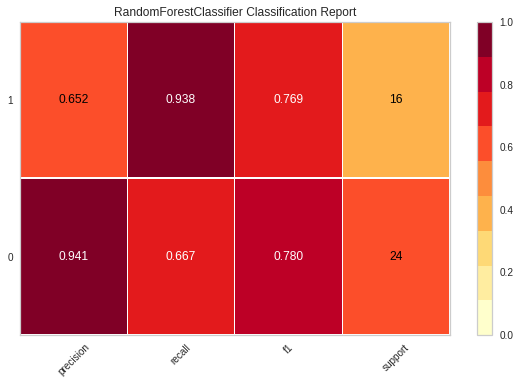

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [63]:
plot_model(tunnel_rf, plot='class_report', use_train_data=False)

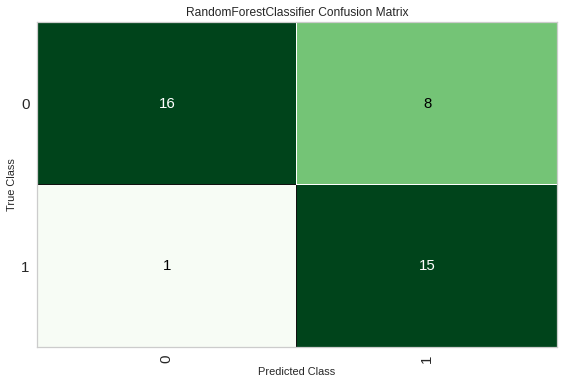

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tunnel_rf, plot='confusion_matrix')

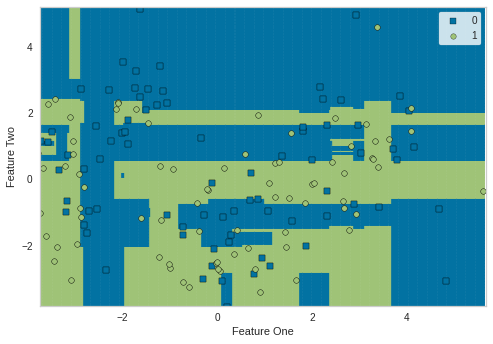

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
# ㅇㅅㅇ;;
plot_model(tunnel_rf, plot='boundary', use_train_data=True)

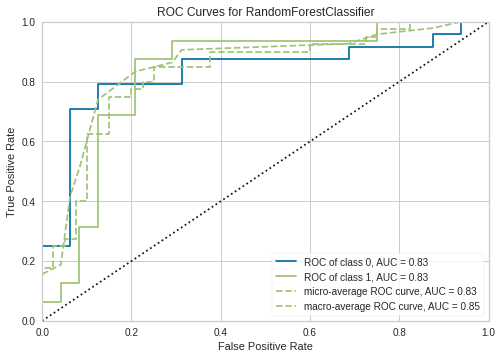

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(tunnel_rf, plot='auc')

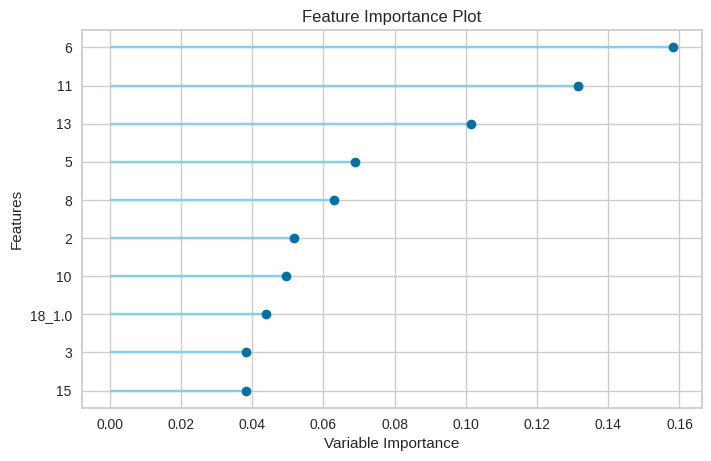

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(tunnel_rf, plot='feature')

In [ ]:
fi_df = pd.DataFrame({'Feature': [x.split('_')[0] for x in get_config('X_train').columns], 
              'Value' : tunnel_rf.feature_importances_}).sort_values(by='Value', ascending=False)
feature_top10 = fi_df['Feature'][:10].to_list()
feature_top10

In [ ]:
# model save
save_model(tunnel_rf, '/content/drive/MyDrive/Colab Notebooks/dao_model/tunnel_rf_tune')

## Inference

In [32]:
inference_data_set = data_set[data_set['0']==0]
inference_data_set['0'] = 1

predictModel(tunnel_rf, inference_data_set, '0')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.0971


In [43]:
for idx in feature_top10 :
  amount = data_set.groupby('0')[idx].mean()
  diff= amount[0]-amount[1]
  inference_data_set[idx] = inference_data_set[idx] - diff
predictModel(tunnel_rf, inference_data_set, '0')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=False, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


개선율: 0.7767


In [47]:
data_set.groupby('0')[feature_top10].mean()

,6,11,13,5,8,2,10,18,3,15
0,,,,,,,,,,
0,-0.110892,-0.052190,7328.062718,90.131706,489.323149,13.982578,0.935411,0.475728,3.055987,4.694175
1,0.252749,0.374685,7284.397251,95.120885,805.088015,18.110225,1.413150,0.734043,3.100709,4.069149


In [64]:
tunnel_insight = data_set.groupby('0')[feature_top10].mean().to_numpy()
tunnel_insight = tunnel_insight.T
tunnel_insight = pd.DataFrame(tunnel_insight, columns=['효율성 낮음 평균', '효율성 높음 평균'])
tunnel_insight['feature_importances values'] = fi_df['Value'][:10].to_list()
tunnel_insight.index = feature_top10
tunnel_insight.index.name='Feature Name'
tunnel_insight = tunnel_insight[['feature_importances values','효율성 낮음 평균', '효율성 높음 평균']]
tunnel_insight

,feature_importances values,효율성 낮음 평균,효율성 높음 평균
Feature Name,,,
6,0.158287,-0.110892,0.252749
11,0.131429,-0.052190,0.374685
13,0.101521,7328.062718,7284.397251
5,0.068971,90.131706,95.120885
8,0.062854,489.323149,805.088015
2,0.051699,13.982578,18.110225
10,0.049393,0.935411,1.413150
18,0.043790,0.475728,0.734043
3,0.038267,3.055987,3.100709


변수 중요도로 뽑힌 변수들의 값을 개선했을 때 53% 이상의 생태통로가 개선될 것으로 예측된다.

tune rf : 0.09 -> 0.534